In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np

In [3]:
data = pd.read_csv('Coal Futures Historical Data_univariate.csv', parse_dates=["Date"], index_col="Date")
data.head()

,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
Date,,,,,,
2018-12-14,76.05,NaN,NaN,NaN,NaN,NaN
2018-12-13,76.35,NaN,NaN,NaN,NaN,NaN
2018-12-12,76.35,NaN,NaN,NaN,NaN,NaN
2018-12-11,75.35,NaN,NaN,NaN,NaN,NaN
2018-12-10,74.65,NaN,NaN,NaN,NaN,NaN


In [13]:
new_data = data.dropna(axis='columns')
new_data.isna().sum()

Price    0
dtype: int64

In [30]:
test = new_data[:int(0.3*(len(data)))] #small
train = new_data[int(0.3*(len(data))):] #big

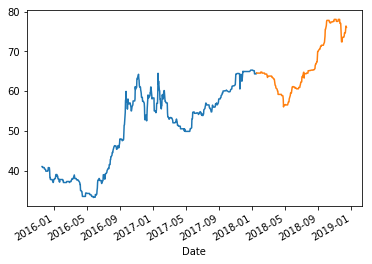

In [31]:
train['Price'].plot()
test['Price'].plot()

In [37]:
#building the model
from pyramid.arima import auto_arima
model = auto_arima(test, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.show()

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=337.502, BIC=358.260, Fit time=0.811 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=343.790, BIC=350.709, Fit time=0.058 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=342.684, BIC=353.062, Fit time=0.056 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=343.195, BIC=353.573, Fit time=0.062 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=339.792, BIC=357.090, Fit time=0.370 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=339.040, BIC=363.257, Fit time=0.790 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=339.851, BIC=357.149, Fit time=0.188 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=338.974, BIC=363.191, Fit time=0.678 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=338.185, BIC=352.024, Fit time=0.258 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 0, 0, 1);

ValueError: Cannot shift with no freq